

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project 



## Project Topic: A Demonstration of Curse of Dimensionality

#### Yajie Zhao
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### Executive Summary

The goal of this project is to demonstrate some visualizations to better understand the concept of the curse of dimensionality. In this study, we first visualized and discussed the data sparsity in 1-D, 2-D, and 3-D space individually. Then, we went beyond 3D dimensions and provided two plots from different perspectives to illustrate the coverage space changes in higher dimensions. After this step, we calculated the Manhattan distance and Euclidean distance among 1000 samples with five increasing dimensions to analyze the distance validity. The results showed that as the dimensions keep increasing, the sparsity will rise, and the distance measures will become invalid in high dimensions. Through this project, we can get a better understanding of the curse of dimensionality. It is a fundamental concept in machine learning. The impact of dimension on the distance between data will become determined if there is some need to use the nearest algorithm in the analysis process.

### Import Packages

```python
import numpy as np                                        # for working with data and model arrays
import matplotlib.pyplot as plt                           # for plotting
import matplotlib.patches as patches                      # for plotting
from mpl_toolkits.mplot3d import Axes3D                   # for 3D plotting
import random                                             # for selecting data points
import torch                                              # for calcualting L1 L2 norms                                          
```

In [38]:
import numpy as np                                        # for working with data and model arrays
import matplotlib.pyplot as plt                           # for plotting
from mpl_toolkits.mplot3d import Axes3D                   # for 3D plotting
import matplotlib.patches as patches                      # for plotting
import random                                             # for selecting data points
import torch                                              # for calcualting L1 L2 norms               

### Workflow of Curse of Dimensionality Project

A short summary of your workflow. This is a suggestion. The main thing is to be clear and concise. Easy to follow!

1. Visualize data distribution and discuss the sparsity in 1D, 2D, 3D plots

2. Visualize data coverage changes in high dimension space

2. Evaluate Manhattan distance & Euclidean distance from low to high dimension space


### 1. Visualize data distribution in 1D, 2D, 3D spaces

1. Slecet 50 samples on a 1d axis where x$\in$(0,100), visulaize the data distrivbution by a scatter plot in 1D space.
2. Slecet 50 samples on a 2d space where x$\in$(0,100) and y$\in$(0,100), visulaize the data distrivbution by a scatter plot in 2D space.
3. Slecet 50 samples on a 3d space where x$\in$(0,100), y$\in$(0,100), and z$\in$(0,100), visulaize the data distrivbution by a scatter plot in 3D space.



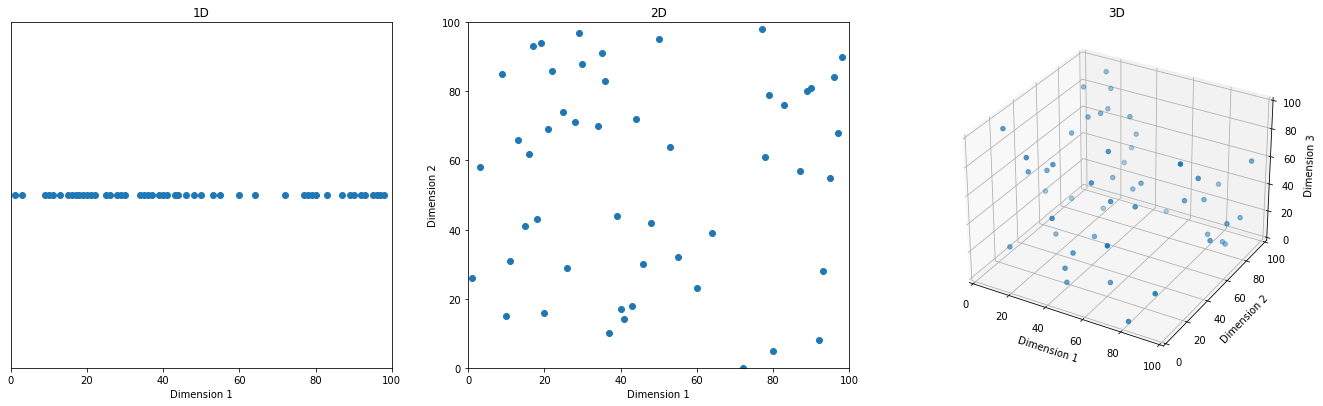

In [39]:
fig = plt.figure()

x = random.sample(range(0, 100), 50) 
y1d = [0 for xval in x]
y = random.sample(range(0, 100), 50) 
z = random.sample(range(0, 100), 50)

ax = fig.add_subplot(1, 3, 1)
plt.scatter(x, y1d)
# Grid lines
ax.set_xlim(0,100)
ax.set_xlabel("Dimension 1")
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("1D")

ax = fig.add_subplot(1, 3, 2)
plt.scatter(x, y)
# Grid lines
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("2D")

ax = fig.add_subplot(1,3,3,projection='3d')
ax.scatter(x,y,z)
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("3D")

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In the above figures, Fifty samples are generated randomly from [0,100] and drawn in 1, 2, and 3 dimensions, separately. When the data is projected into one dimension, the points are close together with variance distance between each other. As we increase the dimensionality into 2D and 3D, as shown in the middle and right plots, it is clear to observe that the distance between two data points in 3D becomes less various than 1D, which implies the the increasing sparsity in the dataset. 

Another perspective to visualize the data sparsity is the coverage changes. For example, let's use a selected range from (10,90) and highlight the coveraged area in different dimensions with the number of covered smaples.

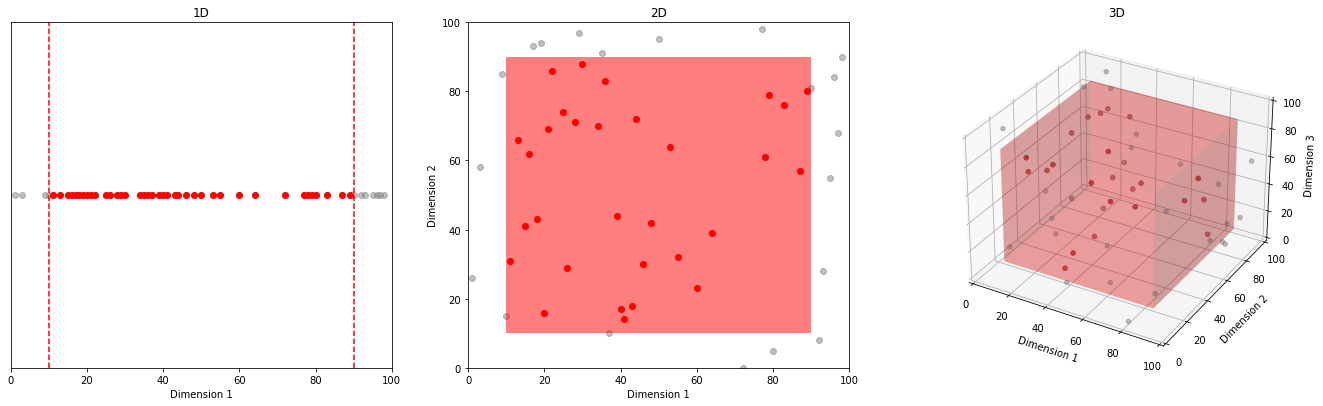

For 1D scatter plot: 80% space is covered and 39 samples is selected
For 2D scatter plot: 64% space is covered and 30 samples is selected
For 3D scatter plot: 51.2% space is covered and 26 samples is selected


In [40]:
i=0
oned_i=[]
twod_i=[]
threed_i=[]

for xpoint in x:
    if x[i]>10 and x[i]<90:
        oned_i.append(i)
        if y[i]>10 and y[i]<90:
            twod_i.append(i)
            if z[i]>10 and z[i]<90:
                threed_i.append(i)
    i=i+1

oned_x=[]
oned_y=[]
for index in oned_i:
    oned_x.append(x[index])
    oned_y.append(y1d[index])
    
twod_x=[]
twod_y=[]
for index in twod_i:
    twod_x.append(x[index])
    twod_y.append(y[index])

threed_x=[]
threed_y=[]
threed_z=[]
for index in threed_i:
    threed_x.append(x[index])
    threed_y.append(y[index])
    threed_z.append(z[index])
          

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.scatter(x, y1d, c='grey',alpha=0.5)
plt.scatter(oned_x, oned_y, c='red')
ax.set_xlim(0,100)
ax.set_xlabel("Dimension 1")
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("1D")

#Lines for range
l1=ax.axvline(10,color='red',ls='--')
l2=ax.axvline(90,color='red',ls='--')

ax = fig.add_subplot(1, 3, 2)
plt.scatter(x, y, c='grey',alpha=0.5)
plt.scatter(twod_x, twod_y, c='red')
# Grid lines
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("2D")

#covered surface
rect = patches.Rectangle((10, 10), 80, 80, facecolor='red',alpha=0.5)
ax.add_patch(rect)

ax = fig.add_subplot(1,3,3,projection='3d')
ax.scatter(x,y,z,c='grey',alpha=0.5)
ax.scatter(threed_x, threed_y, threed_z, c='red')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("3D")

#covered surface
r = [10,90]
X, Y = np.meshgrid(r, r)
Z_top=0*X+0*Y+90
Z_bottom=0*X+0*Y+10
ax.plot_surface(X,Y,Z_top, alpha=0.2, color='r')
ax.plot_surface(X,Y,Z_bottom, alpha=0.2, color='r')
ax.plot_surface(X,Z_top,Y, alpha=0.2,color='r')
ax.plot_surface(X,Z_bottom,Y, alpha=0.2,color='r')
ax.plot_surface(Z_top,X,Y, alpha=0.2,color='r')
ax.plot_surface(Z_bottom,X,Y, alpha=0.2,color='r')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

print("For 1D scatter plot: 80% space is covered and "+str(len(oned_x))+" samples is selected")
print("For 2D scatter plot: 64% space is covered and "+str(len(twod_x))+" samples is selected")
print("For 3D scatter plot: 51.2% space is covered and "+str(len(threed_x))+" samples is selected")

As we can see, the covered space decreases with increasing dimensions, and the valid numbers of samples also become less. The less coverage also implies the rising sparsity of the data points. To better understand the coverage changes in higher dimensions, The next step is to provide a more detailed illustration of the relationship between covered space and dimensionality.



### 2. Visualize data coverage in higher dimensional spaces
1. Assume a **p**-dimensional hypercube with unit volume (Vp = 1), **n** data points are uniformally distributed inside it. 
2. Calculate the covered volume with selected ratio **r**(%) on each dimension. 
3. Calculate the required volume to capture **s**(%) of the smaples in different dimensions .
3. Plot the two graphs and analyze the coverage volume with increasing dimensions.


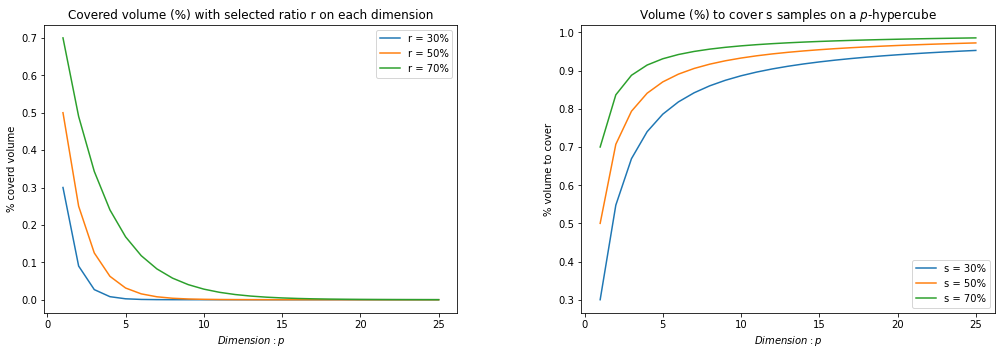

In [37]:
x=range(1,26)
plt.subplot(1,2,1)
plt.plot(x, [0.3**(n) for n in x], label="r = 30%")
plt.plot(x, [0.5**(n) for n in x], label="r = 50%")
plt.plot(x, [0.7**(n) for n in x], label="r = 70%")
plt.title("Covered volume (%) with selected ratio r on each dimension")
plt.xlabel('$Dimension:p$')
plt.ylabel('% coverd volume')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, [0.3**(1/n) for n in x], label="s = 30%")
plt.plot(x, [0.5**(1/n) for n in x], label="s = 50%")
plt.plot(x, [0.7**(1/n) for n in x], label="s = 70%")
plt.title("Volume (%) to cover s samples on a $p$-hypercube")
plt.xlabel('$Dimension:p$')
plt.ylabel('% volume to cover')
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.0, wspace=0.3, hspace=0.2)
plt.show()

The left plot is an extension of the previous polts in 1D, 2D, and 3D. It is clear to observe that when the selected ratio on each dimension is determined, the covered space will decrease significantly as p increases. The right figure presents another way to explain the same concept. When we want to capture s(%) of the samples, the required space to cover these samples increases with dimensionality.

Therefore, we can deduce that when the dimension keeps increasing, the sparsity will keep rising, the distance between points will become meaningless because the distances from all points to other points tend to be the same. The next step of this research is to investigate the distance changes (L1 & L2) in high dimensions.



### 3. Evaluate Manhattan distance & Euclidean distance

1. Determine numbers of samples **n** and 5 dimensions **dim**, which are {5, 50, 500, 5000, 50000}
2. Calculate the Manhattan distance and Euclidean distance betwween each two samples within every dimensions
3. Plot histrograms in different dimentions to show the chnages of both type of sidtance measurements



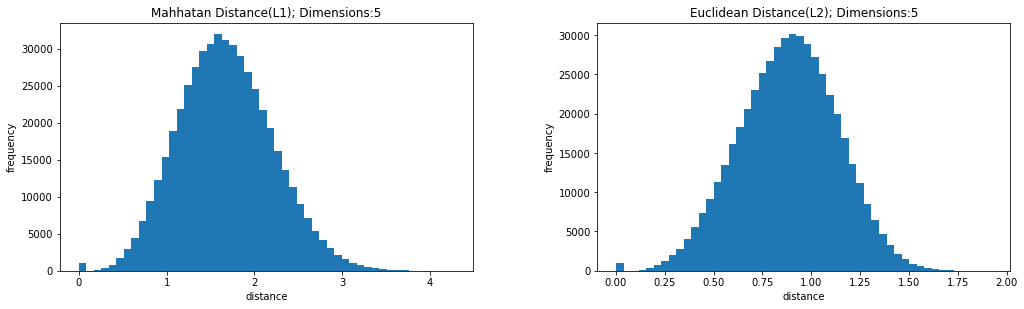

For Mahhatan Distance(L1) with dimension 5, the mean is 1.6739990691881437, the standard deviation is 0.5344482249645625
For Euclidean Distance(L2) with dimension 5, the mean is 0.8827770110133099, the standard deviation is 0.2513058301593035


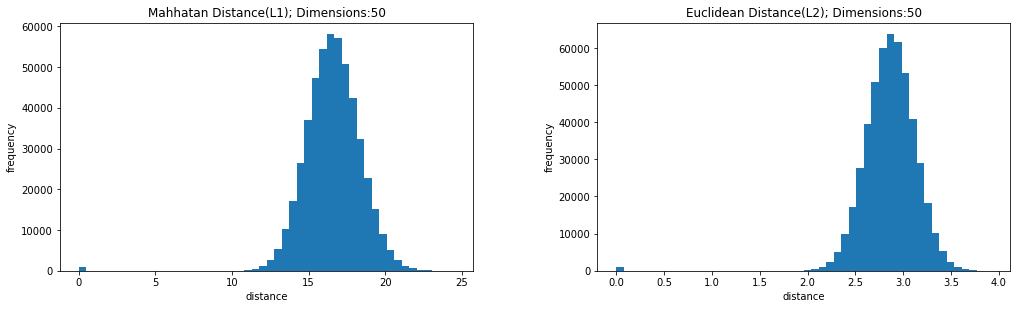

For Mahhatan Distance(L1) with dimension 50, the mean is 16.585161830118963, the standard deviation is 1.8252544863452804
For Euclidean Distance(L2) with dimension 50, the mean is 2.8624272386836855, the standard deviation is 0.27488407567056794


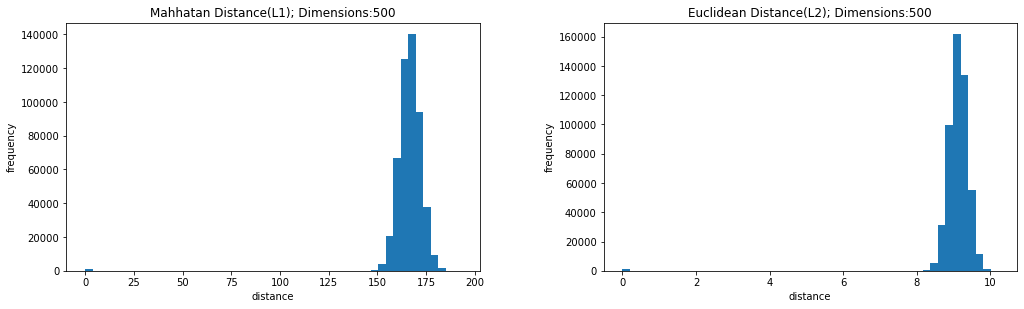

For Mahhatan Distance(L1) with dimension 500, the mean is 166.37893648746274, the standard deviation is 9.105896244078965
For Euclidean Distance(L2) with dimension 500, the mean is 9.109807880611955, the standard deviation is 0.4728182155413325


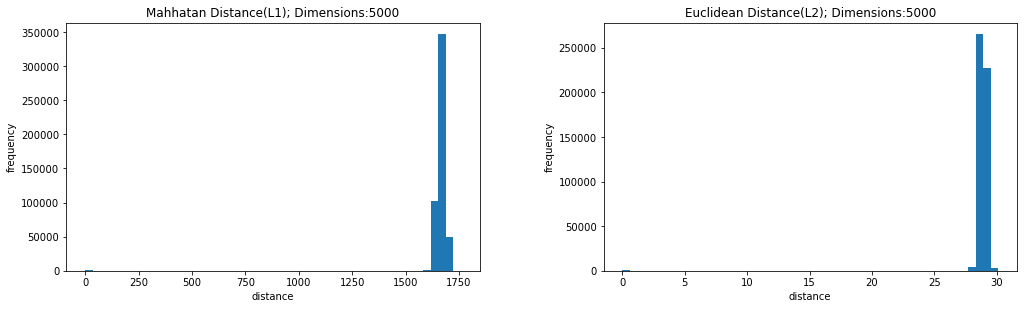

For Mahhatan Distance(L1) with dimension 5000, the mean is 1663.3242148325307, the standard deviation is 76.27216539382917
For Euclidean Distance(L2) with dimension 5000, the mean is 28.808602508500954, the standard deviation is 1.3113164728754776


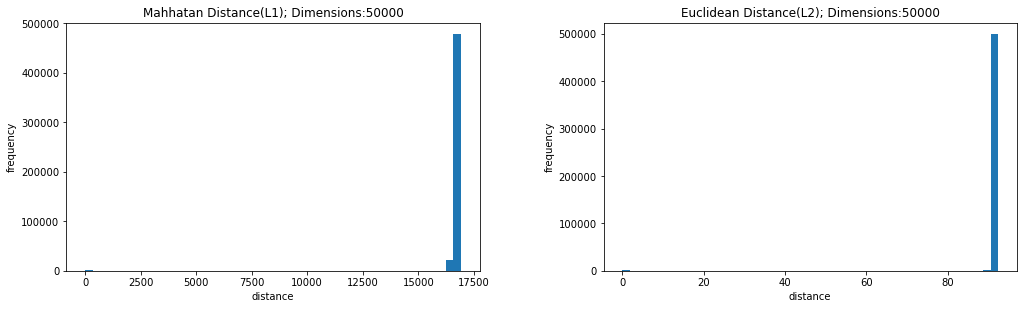

For Mahhatan Distance(L1) with dimension 50000, the mean is 16634.001324257773, the standard deviation is 746.1111671664698
For Euclidean Distance(L2) with dimension 50000, the mean is 91.10813720577012, the standard deviation is 4.0820389354981925


In [45]:
dim = [5,50,500,5000,50000]
n = 1000
length = len(dim)
i=0

for dim_num in dim:
    sample = torch.rand(n, dim_num)
    # Calculate L1 distance
    distance1 = torch.cdist(sample, sample, 1)
    down_tril = torch.tril(distance1, diagonal=0)
    dis1_sum = distance1[distance1 == down_tril]
    dis1_sum = dis1_sum.tolist()
    # Calculate L2 distance
    distance2 = torch.cdist(sample, sample, 2)
    down_tril2 = torch.tril(distance2, diagonal=0)
    dis2_sum = distance2[distance2 == down_tril2]
    dis2_sum = dis2_sum.tolist()
    
    plt.subplot(length,2,i+1)
    plt.hist(dis1_sum, bins=50)
    plt.xlabel("distance")
    plt.ylabel("frequency")
    plt.title(f"Mahhatan Distance(L1); Dimensions:{dim_num}")
    mean1 = np.mean(dis1_sum)
    std1 = np.std(dis1_sum)

    plt.subplot(length,2,i+2)
    plt.hist(dis2_sum, bins=50)
    plt.xlabel("distance")
    plt.ylabel("frequency")
    plt.title(f"Euclidean Distance(L2); Dimensions:{dim_num}")
    mean2 = np.mean(dis2_sum)
    std2 = np.std(dis2_sum)


    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=5.0, wspace=0.3, hspace=0.2)
    plt.show()
    
    print('For Mahhatan Distance(L1) with dimension '+str(dim_num)+', the mean is '+ str(mean1) +', the standard deviation is '+str(std1))
    print('For Euclidean Distance(L2) with dimension '+str(dim_num)+', the mean is '+ str(mean2) +', the standard deviation is '+str(std2))
    i=i+2

Through above plots, It can be observed that at 5 and 50 dimensions, the two types of distances measurements are normally distributed.It ia also noted that a spike can be clearly obseved on the left side, representing the distance between same points, which equal to zero (dist(A,A)=0). When the dimensionality continues to rise, the L1 L2 distance become invalid. Therefore, we can conclude that as the dimension increases, the distance between data and data starts to tend to the same value.

### Results

It is known that data with high dimensions always lead to some difficulties for analysis. One of the most important aspects is that the distance becomes imprecise for high dimensions data. The reason behind is, with constant number of samples, increasing dimensionality will increase the sparsity of the data points. when the dimensionality tends to infinity, all points basically evenly spaced from each other, the difference between the closest point and the farthest point from a certain point is not very big. Therefore, when we searching for the n closest points in high dimensions, the search results may not be as meaningful as at low dimensions.



I hope this was helpful,

*Yajie Zhao*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
